# Evaluation of pickled pipelines
This notebook is used to evaluate every .pkl model that has been generated.

Some observations
* Results suggest that the parameters of the random forests and XGboost are not being trained properly
* Naive bayes methods are perfoming very well. Maybe it is about time to understand them in a better we
* Two families of pipelines are still missing: SVM and NN.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pipeline_utilities import ColumnSelector
from pipeline_utilities import ModelTransformer
from pipeline_utilities import study_performance_of_all_available_pickled_models

In [2]:
dr = study_performance_of_all_available_pickled_models()

In [3]:
dr.dropout_score.max()

0.8941678275522613

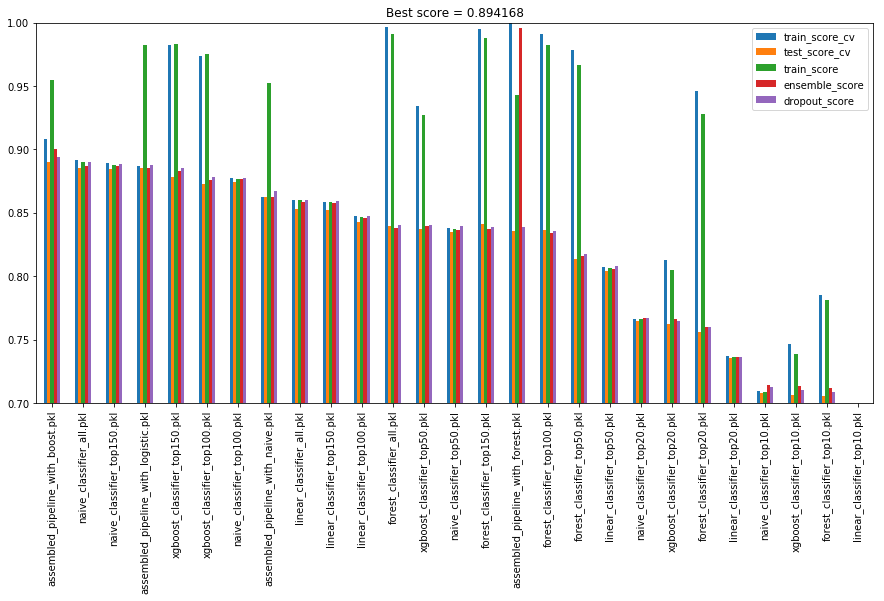

In [4]:
dr.sort_values(by='dropout_score', ascending=False).plot.bar(ylim=(0.7,1), figsize=(15, 7), title= 'Best score = %3f'% (dr.dropout_score.max()));